# Exercise 6.5 Unsupervised Machine Learning

## 1. Import libraries, set system path, and load the dataset

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Set system path
path = r'C:\Users\Stony\OneDrive\CareerFoundry\Data Immersion Course\Achievement 6\Covid Analysis'

In [3]:
# Import dataset into df_covid_19 dataframe
df_covid_19 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned_Conditions_Contributing_to_COVID-19_Deaths.csv'))

In [4]:
# Validate dataset loaded correctly
print(df_covid_19.head())
print(df_covid_19.info())
df_covid_19.shape

   Data As Of  Start Date    End Date    Year  Month    State  \
0  2023-09-24  2020-01-01  2020-01-31  2020.0    1.0  Alabama   
1  2023-09-24  2020-02-01  2020-02-29  2020.0    2.0  Alabama   
2  2023-09-24  2020-03-01  2020-03-31  2020.0    3.0  Alabama   
3  2023-09-24  2020-04-01  2020-04-30  2020.0    4.0  Alabama   
4  2023-09-24  2020-05-01  2020-05-31  2020.0    5.0  Alabama   

        Condition Group                Condition ICD10_codes Age Group  \
0  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
1  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
2  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
3  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
4  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   

   COVID-19 Deaths  Number of Mentions Flag  
0              0.0                 0.0  NaN  
1              0.0                 0.0  NaN  
2              0.0        

(430560, 13)

## 2. Data Wrangling

In [5]:
# Drop non-numeric columns from the dataframe
df_covid_19_numeric = df_covid_19.select_dtypes(include=[np.number])

In [6]:
# Validate non-numeric columns have been dropped
print(df_covid_19_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                430560 non-null  float64
 1   Month               430560 non-null  float64
 2   COVID-19 Deaths     430560 non-null  float64
 3   Number of Mentions  430560 non-null  float64
dtypes: float64(4)
memory usage: 13.1 MB
None


In [7]:
# Select relevant columns for clustering
features = df_covid_19_numeric[['COVID-19 Deaths', 'Number of Mentions']]

In [8]:
# Validate our columns
print(features.head())

   COVID-19 Deaths  Number of Mentions
0              0.0                 0.0
1              0.0                 0.0
2              0.0                 0.0
3              0.0                 0.0
4              0.0                 0.0


In [9]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [10]:
# Validate the standardization
print(pd.DataFrame(scaled_features, columns=features.columns).head())

   COVID-19 Deaths  Number of Mentions
0        -0.202281           -0.206419
1        -0.202281           -0.206419
2        -0.202281           -0.206419
3        -0.202281           -0.206419
4        -0.202281           -0.206419


## 3. Determining the breakpoint (Elbow Technique)

In [11]:
# Using the elbow technique with the negative inertia (score) method
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]
score = [kmeans[i].fit(scaled_features).score(scaled_features) for i in range(len(kmeans))]

score

[-861119.9999999766,
 -411569.31494509516,
 -233783.25802292433,
 -150000.4376280877,
 -105794.57073789838,
 -74384.06676040811,
 -57485.69946268232,
 -44977.00833423415,
 -38111.219235872326]

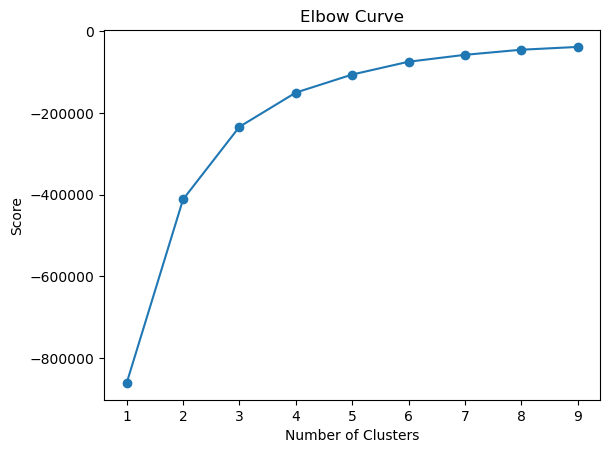

In [12]:
# Plot the breakpoint (elbow technique) graph with pylab
pl.plot(num_cl,score, marker='o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')


# Export the elbow method graph
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'elbow_method_pylab.png')
pl.savefig(file_name)

pl.show()

## 4. Determine the ideal number of clusters

When analyzing the Elbow curve plot, it appears that the ideal number of clusters is 4. After 4 clusters, the data begins to flatten out and plot veritcally thereafter.

## 5. Applying the K-means algorithm

In [13]:
# Apply the K-means algorithm to the standardized data with the chosen number of clusters, 4
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)

## 6. Adding cluster labels to the original dataframe and numeric subset dataframe

In [14]:
# Add the cluster labels to the original dataframe and to the subset
df_covid_19['Cluster'] = kmeans.fit_predict(scaled_features)
df_covid_19_numeric['Cluster'] = kmeans.fit_predict(scaled_features)

In [15]:
# Validate the cluster labels applied correctly
print(df_covid_19_numeric.head())

     Year  Month  COVID-19 Deaths  Number of Mentions  Cluster
0  2020.0    1.0              0.0                 0.0        0
1  2020.0    2.0              0.0                 0.0        0
2  2020.0    3.0              0.0                 0.0        0
3  2020.0    4.0              0.0                 0.0        0
4  2020.0    5.0              0.0                 0.0        0


## 7. Visualize the clustered data

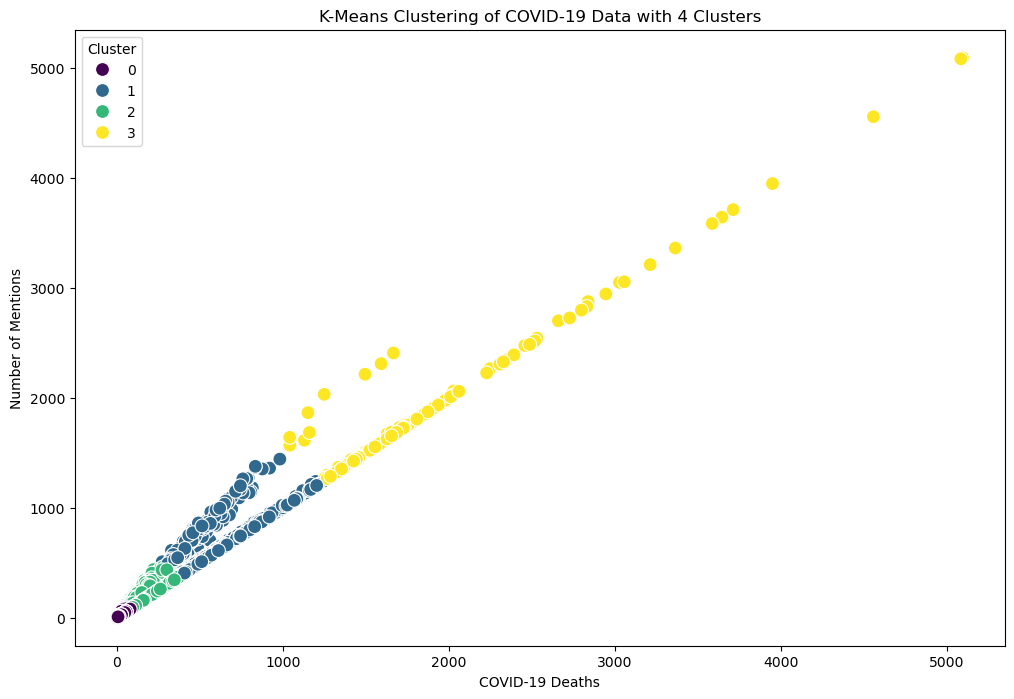

In [16]:
# Plot the clusters of COVID-19 Deaths and Number of Mentions
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_covid_19_numeric, x='COVID-19 Deaths', y='Number of Mentions', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of COVID-19 Data with 4 Clusters')
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Number of Mentions')
plt.legend(title='Cluster')

# Export the scatterplot of clusters
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'kmeans_clustering.png')
plt.savefig(file_name)

plt.show()

## 8. Additional K-Means analyses on the top medical conditions previously identified

To reiterate, the top 5 medical conditions identified in previous analyses are:

Influenza and pneumonia <br>
Diabetes <br>
Ischemic heart disease <br>
Renal failure <br>
Vascular and unspecified dementia

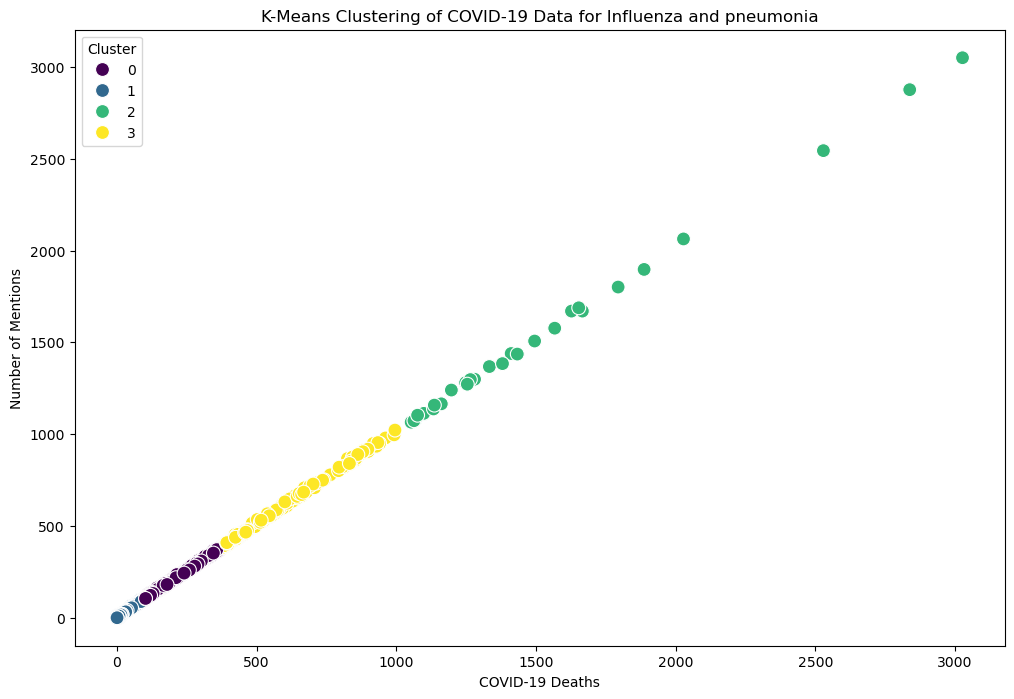

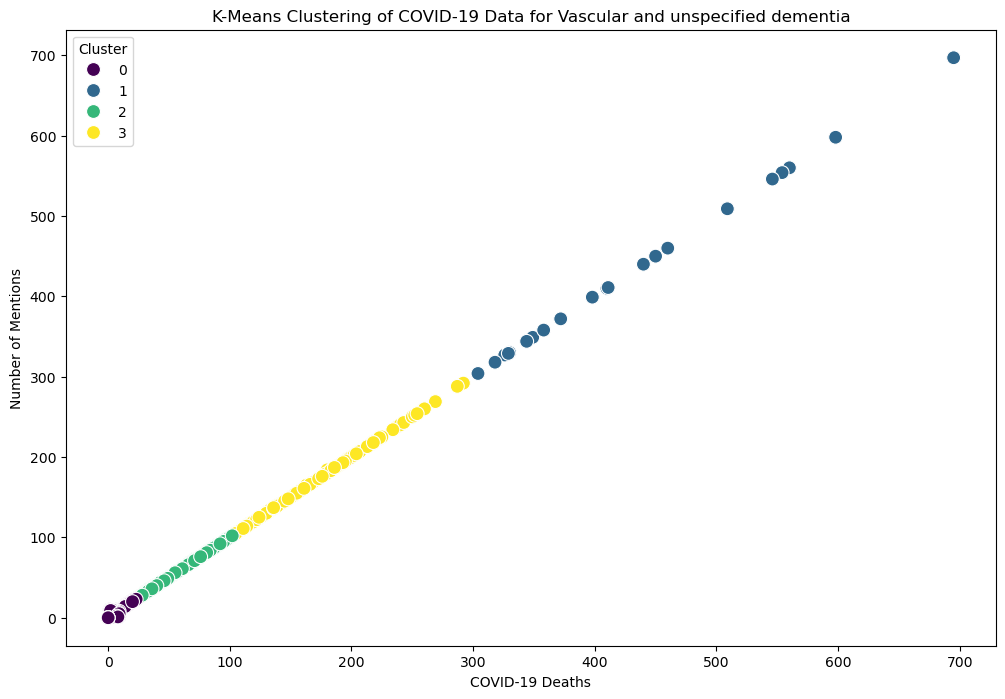

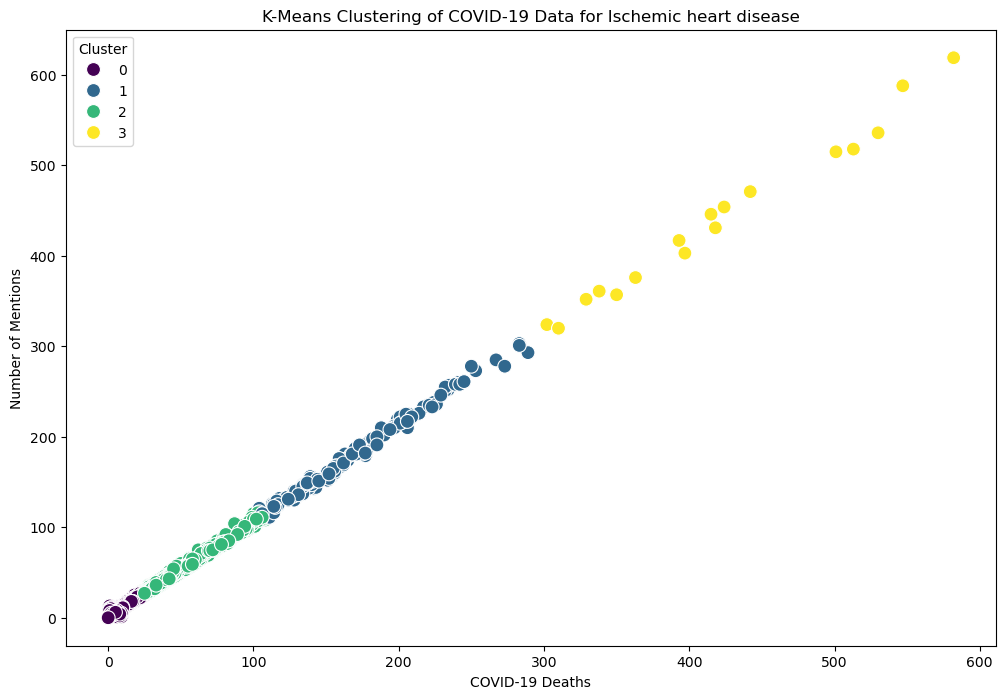

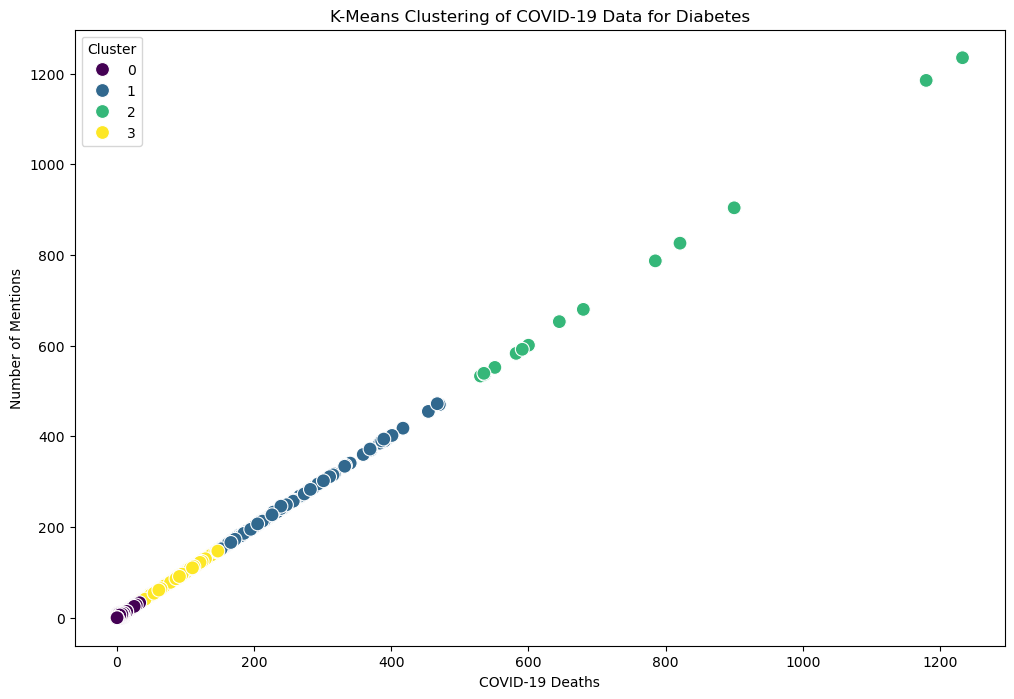

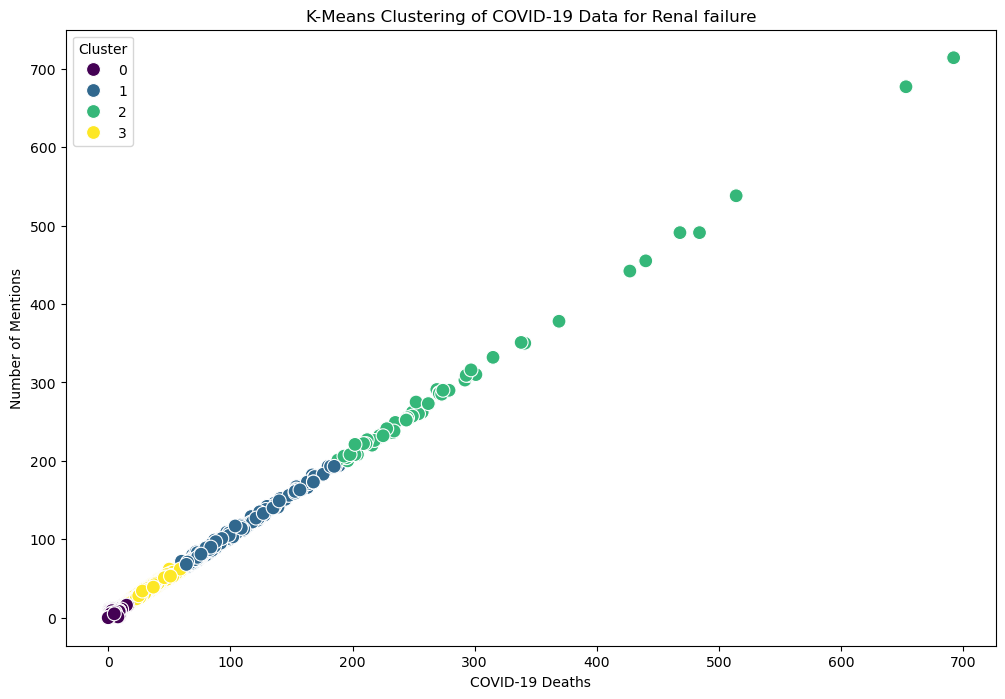

In [26]:
# Filter the original dataset to include only the desired conditions
top_conditions = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Ischemic heart disease', 'Diabetes', 'Renal failure']

# Loop through each condition, running the K-Means clustering analyses and creating scatterplots
for condition in top_conditions:
    # Filter the original dataset for the desired medical conditions
    df_condition = df_covid_19[df_covid_19['Condition'] == condition].copy()
    
    # Select relevant numeric variables for clustering
    features_condition = df_condition[['COVID-19 Deaths', 'Number of Mentions']]
    
    # Standardize the data
    scaled_features_condition = scaler.fit_transform(features_condition)
             
    # Run K-Means algorithm using optimal clusters = 4
    kmeans_condition = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)
    df_condition.loc[:, 'Cluster'] = kmeans_condition.fit_predict(scaled_features_condition)
        
    # Create a scatterplot for each of the specific conditions
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_condition, x='COVID-19 Deaths', y='Number of Mentions', hue='Cluster', palette='viridis', s=100)
    plt.title(f'K-Means Clustering of COVID-19 Data for {condition}')
    plt.xlabel('COVID-19 Deaths')
    plt.ylabel('Number of Mentions')
    plt.legend(title='Cluster')
    
        
    # Export the scatter plot
    file_name = os.path.join(path, '04 Analysis', 'Visualizations', f'kmeans_clustering_{condition.replace(" ", "_").lower()}.png')
    plt.savefig(file_name)

    plt.show()

## 9. Discussion of the results of the clustering analyses

Reviewing the results of the analysis, the clusters make sense since they are grouping similar numbers of Covid-19 deaths and number of mentions. Cluster 0 is the largest cluster with most of the data points having low numbers of mentions and deaths. Clusters 1 and 3 represent groupings with increasing mortality and number of mentions; cluster 2 is between clusters 0 and 1 which indicates a moderate number of mentions and deaths. Taken in the context of Covid-19 impact the clusters can be interpreted as:

Cluster 0 = minimal impact <br>
Cluster 2 = moderate impactr <br>
Cluster 1 = high impact <br>
Cluster 3 = very high impact

## 10. Calculate descriptive statistics for the clusters

In [19]:
# Descriptive stats for clusters
cluster_stats = df_covid_19_numeric.groupby('Cluster').agg(['count', 'mean', 'std', 'min', 'max'])
print(cluster_stats)

           Year                                          Month            \
          count         mean       std     min     max   count      mean   
Cluster                                                                    
0        419520  2021.412898  1.086691  2020.0  2023.0  419520  6.195035   
1          1196  2020.761706  0.734725  2020.0  2023.0    1196  6.026756   
2          9715  2020.930623  0.807064  2020.0  2023.0    9715  6.450335   
3           129  2020.720930  0.637092  2020.0  2022.0     129  5.100775   

                             COVID-19 Deaths                                   \
              std  min   max           count         mean         std     min   
Cluster                                                                         
0        3.328141  1.0  12.0          419520     5.505916   10.734069     0.0   
1        4.306961  1.0  12.0            1196   586.466555  204.482536   272.0   
2        4.079365  1.0  12.0            9715   149.112712   70

### Analysis of descriptive statistics

There is considerable variability within the clusters, as evidenced by the standard deviations of the clusters. This is especially seen between clusters 1 and 3, which have high degrees of variability in Covid-19 mortality and number of mentions. The mean values of deaths and number of mentions also increases progressively through clusters 0, 2, 1, and 3 respectively illustrating the gradient of Covid-19's impact across the different clusters.

## 11. How can these results be useful?

K-Means clustering can be useful by using cluster labels to improve the accuracy and context awareness of any new models created or retrofitted into existing models that can benefit from the added accuracy. Furthermore, we can highlight differences between clusters through creation of visualizations which will in turn lead to better communication and more informed decision making.

## 12. Exporting our clustered dataframe

In [20]:
# Final validation of the clustered dataframe 
print(df_covid_19.head())
print(df_covid_19.info())
df_covid_19.shape

   Data As Of  Start Date    End Date    Year  Month    State  \
0  2023-09-24  2020-01-01  2020-01-31  2020.0    1.0  Alabama   
1  2023-09-24  2020-02-01  2020-02-29  2020.0    2.0  Alabama   
2  2023-09-24  2020-03-01  2020-03-31  2020.0    3.0  Alabama   
3  2023-09-24  2020-04-01  2020-04-30  2020.0    4.0  Alabama   
4  2023-09-24  2020-05-01  2020-05-31  2020.0    5.0  Alabama   

        Condition Group                Condition ICD10_codes Age Group  \
0  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
1  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
2  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
3  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
4  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   

   COVID-19 Deaths  Number of Mentions Flag  Cluster  
0              0.0                 0.0  NaN        0  
1              0.0                 0.0  NaN        0  

(430560, 14)

In [21]:
# Export the "df_cov_19" dataframe to CSV
df_covid_19.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clustered_covid_data.csv'), index=False)